In [1]:
library(OpenStreetMap)
library(ggplot2)
library(sp)
library (rgdal)
library(readr)

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolygons” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for me

In [2]:
# South of Tropic of Capricorn
LAT1 = -23 ; LAT2 = -85
LON1 = -180 ; LON2 = 180

In [3]:
map <- openmap(c(LAT2,LON1), c(LAT1,LON2),
   zoom = 2,
   type = "esri-topo",
   mergeTiles = TRUE)
print("done loading map")

[1] "done loading map"


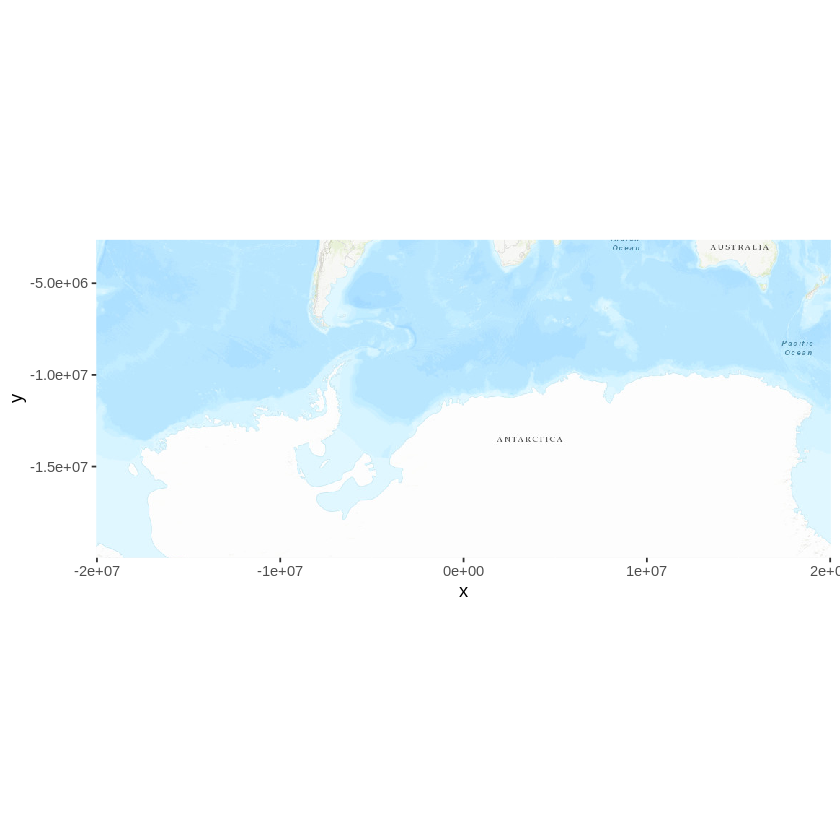

In [4]:
autoplot(map)

In [5]:
occurrences <- read_tsv("data//GBIF_Spheniscidae.zip")

Parsed with column specification:
cols(
  .default = col_character(),
  gbifID = col_double(),
  infraspecificEpithet = col_logical(),
  individualCount = col_double(),
  decimalLatitude = col_double(),
  decimalLongitude = col_double(),
  coordinateUncertaintyInMeters = col_double(),
  coordinatePrecision = col_logical(),
  elevation = col_double(),
  elevationAccuracy = col_double(),
  depth = col_logical(),
  depthAccuracy = col_logical(),
  eventDate = col_datetime(format = ""),
  day = col_double(),
  month = col_double(),
  year = col_double(),
  taxonKey = col_double(),
  speciesKey = col_double(),
  dateIdentified = col_logical(),
  typeStatus = col_logical(),
  establishmentMeans = col_logical()
  # ... with 2 more columns
)

See spec(...) for full column specifications.

Warning message:
“303318 parsing failures.
 row                  col           expected                                      actual                          file
4317 mediaType            1/0/T/F/TRUE/FALSE S

In [36]:
# filter out occurrences above LAT1
occurrences.sampled <- 
   occurrences[occurrences$decimalLatitude < LAT1, ]
# filter out occurrences without species name
occurrences.sampled <-
   occurrences.sampled[!is.na(occurrences.sampled$species), ]
# randomly sample 10.000 occurrences
occurrences.sampled <-
   occurrences.sampled[sample(nrow(occurrences.sampled), 10000),]

print("done sampling data")

[1] "done sampling data"


In [39]:
coordinates(occurrences.sampled) <- c("decimalLongitude", "decimalLatitude")
proj4string(occurrences.sampled) <- CRS("+proj=longlat +ellps=clrk66")

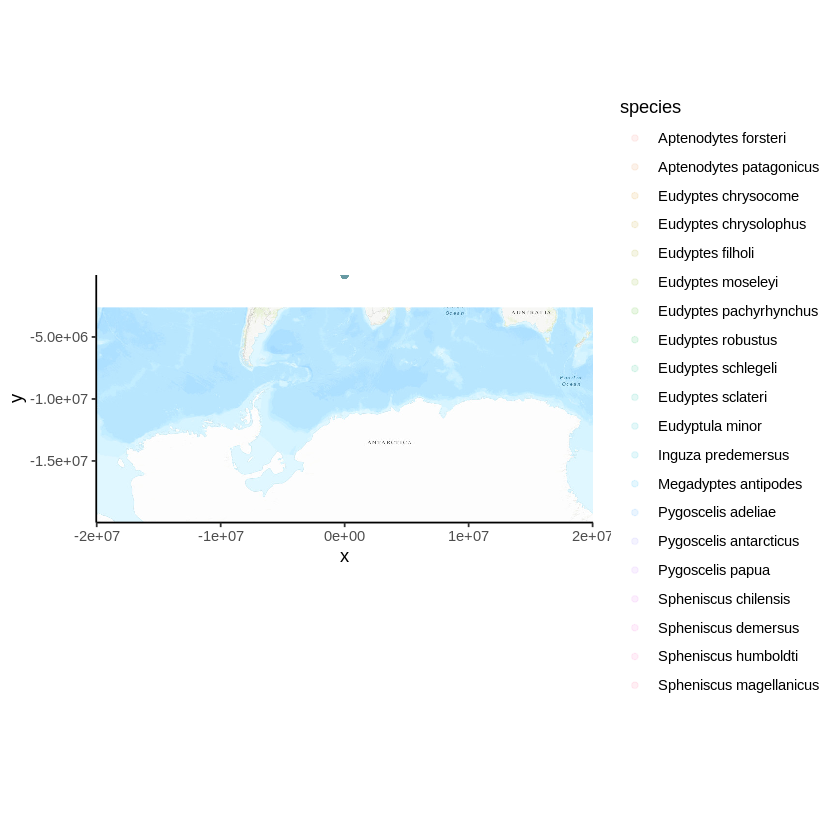

In [40]:
autoplot(map) + 
    geom_point(
        data = data.frame(occurrences.sampled), 
        aes(x = decimalLongitude, y = decimalLatitude, color=species),
        alpha=0.1
    ) + 
    theme_classic()